# 3. Train-Predict

**Tensorboard**
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

In [1]:
import time
import os
import pandas as pd

project_name = 'Dog_Breed_Identification'
step_name = 'Train'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

cwd = os.getcwd()
model_path = os.path.join(cwd, 'model')
print('model_path: ' + model_path)

run_name: Dog_Breed_Identification_Train_20171024_225343
model_path: E:\Kaggle\Dog_Breed_Identification\model


In [2]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2017)

x_train = []
y_train = {}
x_val = []
y_val = {}
x_test = []

cwd = os.getcwd()
feature_cgg16 = os.path.join(cwd, 'model', 'feature_VGG16_{}.h5'.format(171023))
feature_cgg19 = os.path.join(cwd, 'model', 'feature_VGG19_{}.h5'.format(171023))
feature_resnet50 = os.path.join(cwd, 'model', 'feature_ResNet50_{}.h5'.format(171023))
feature_xception = os.path.join(cwd, 'model', 'feature_Xception_{}.h5'.format(171023))
feature_inception = os.path.join(cwd, 'model', 'feature_InceptionV3_{}.h5'.format(171023))
for filename in [feature_cgg16, feature_cgg19, feature_resnet50, feature_xception, feature_inception]:
    with h5py.File(filename, 'r') as h:
        x_train.append(np.array(h['train']))
        y_train = np.array(h['train_label'])
        x_val.append(np.array(h['val']))
        y_val = np.array(h['val_label'])
        x_test.append(np.array(h['test']))

# print(x_train[0].shape)
x_train = np.concatenate(x_train, axis=-1)
# y_train = np.concatenate(y_train, axis=0)
x_val = np.concatenate(x_val, axis=-1)
# y_val = np.concatenate(y_val, axis=0)
x_test = np.concatenate(x_test, axis=-1)
print(x_train.shape)
print(x_train.shape[1:])

print(len(y_train))
print(x_val.shape)
print(len(y_val))
print(x_test.shape)

(9710, 7168)
(7168,)
9710
(512, 7168)
512
(10357, 7168)


In [3]:
from sklearn.utils import shuffle
(x_train, y_train) = shuffle(x_train, y_train)

In [4]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train.shape)
print(y_val.shape)

Using TensorFlow backend.


(9710, 120)
(512, 120)


In [5]:
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam

# model = Sequential()
# model.add(Dense(5000, input_shape=x_train.shape[1:]))
# model.add(Dropout(0.5))
# model.add(Dense(120, activation='softmax'))

# inputs = Input(x_train.shape[1:])
# x = inputs
# x = Dropout(0.5)(x)
# x = Dense(120, activation='softmax')(x)
# model = Model(inputs, x)

model = Sequential()
model.add(Dense(1000, input_shape=x_train.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
from keras.callbacks import TensorBoard

log_path = os.path.join(model_path, run_name)
print('log_dir:' + log_path)
tensorBoard = TensorBoard(log_dir=log_path)

log_dir:E:\Kaggle\Dog_Breed_Identification\model\Dog_Breed_Identification_Train_20171024_225343


In [7]:
hist = model.fit(x_train, y_train,
                 batch_size=16,
                 epochs=20, #Increase this when not on Kaggle kernel
                 verbose=2,  #1 for ETA, 0 for silent
                 validation_data=(x_val, y_val), 
                 callbacks=[tensorBoard])

Train on 9710 samples, validate on 512 samples
Epoch 1/20
10s - loss: 4.4439 - acc: 0.0717 - val_loss: 2.8208 - val_acc: 0.4297
Epoch 2/20
10s - loss: 2.7247 - acc: 0.3520 - val_loss: 1.5925 - val_acc: 0.6641
Epoch 3/20
9s - loss: 1.7407 - acc: 0.5856 - val_loss: 1.0128 - val_acc: 0.7734
Epoch 4/20
9s - loss: 1.2220 - acc: 0.7094 - val_loss: 0.7272 - val_acc: 0.8164
Epoch 5/20
9s - loss: 0.9132 - acc: 0.7769 - val_loss: 0.6163 - val_acc: 0.8184
Epoch 6/20
9s - loss: 0.7177 - acc: 0.8251 - val_loss: 0.5274 - val_acc: 0.8398
Epoch 7/20
9s - loss: 0.5893 - acc: 0.8499 - val_loss: 0.4673 - val_acc: 0.8359
Epoch 8/20
9s - loss: 0.5076 - acc: 0.8714 - val_loss: 0.4348 - val_acc: 0.8594
Epoch 9/20
9s - loss: 0.4293 - acc: 0.8841 - val_loss: 0.4255 - val_acc: 0.8594
Epoch 10/20
9s - loss: 0.3760 - acc: 0.9024 - val_loss: 0.4082 - val_acc: 0.8477
Epoch 11/20
8s - loss: 0.3335 - acc: 0.9154 - val_loss: 0.4128 - val_acc: 0.8711
Epoch 12/20
9s - loss: 0.2803 - acc: 0.9279 - val_loss: 0.3754 - val_

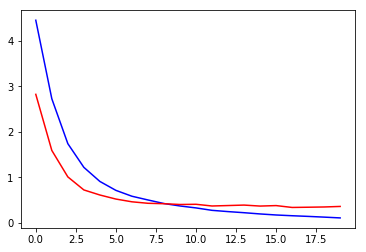

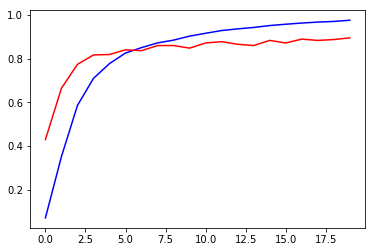

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [9]:
def saveModel(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
saveModel(model, run_name)

## Predict

In [10]:
# Used to load model directly and skip train
# import os
# from keras.models import load_model
# cwd = os.getcwd()
# model = load_model(os.path.join(cwd, 'model', 'Dog_Breed_Identification_Train_20171024_155154.h5'))

In [11]:
y_pred = model.predict(x_test, batch_size=128)
print(y_pred.shape)

(10357, 120)


In [12]:
# print(y_pred[:10])
# y_pred = np.clip(y_pred, 0.005, 0.995)
# print(y_pred[:10])

In [13]:
files = os.listdir(os.path.join(cwd, 'input', 'data_test', 'test'))
print(files[:10])

['000621fb3cbb32d8935728e48679680e.jpg', '00102ee9d8eb90812350685311fe5890.jpg', '0012a730dfa437f5f3613fb75efcd4ce.jpg', '001510bc8570bbeee98c8d80c8a95ec1.jpg', '001a5f3114548acdefa3d4da05474c2e.jpg', '00225dcd3e4d2410dd53239f95c0352f.jpg', '002c2a3117c2193b4d26400ce431eebd.jpg', '002c58d413a521ae8d1a5daeb35fc803.jpg', '002f80396f1e3db687c5932d7978b196.jpg', '0036c6bcec6031be9e62a257b1c3c442.jpg']


In [14]:
cwd = os.getcwd()
df = pd.read_csv(os.path.join(cwd, 'input', 'labels.csv'))
print('lables amount: %d' %len(df))
df.head()

lables amount: 10222


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [15]:
n = len(df)
breed = set(df['breed'])
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
num_to_class = dict(zip(range(n_class), breed))
print(breed)

{'brabancon_griffon', 'dingo', 'clumber', 'sealyham_terrier', 'norfolk_terrier', 'vizsla', 'golden_retriever', 'bedlington_terrier', 'standard_schnauzer', 'border_collie', 'miniature_schnauzer', 'west_highland_white_terrier', 'japanese_spaniel', 'airedale', 'yorkshire_terrier', 'giant_schnauzer', 'shetland_sheepdog', 'staffordshire_bullterrier', 'greater_swiss_mountain_dog', 'collie', 'groenendael', 'mexican_hairless', 'french_bulldog', 'chesapeake_bay_retriever', 'wire-haired_fox_terrier', 'boxer', 'entlebucher', 'chihuahua', 'rottweiler', 'blenheim_spaniel', 'welsh_springer_spaniel', 'soft-coated_wheaten_terrier', 'chow', 'great_dane', 'pug', 'beagle', 'norwegian_elkhound', 'pomeranian', 'ibizan_hound', 'bouvier_des_flandres', 'black-and-tan_coonhound', 'toy_terrier', 'toy_poodle', 'pembroke', 'afghan_hound', 'borzoi', 'doberman', 'old_english_sheepdog', 'gordon_setter', 'leonberg', 'border_terrier', 'redbone', 'shih-tzu', 'kuvasz', 'african_hunting_dog', 'cardigan', 'labrador_retrie

In [16]:
df2 = pd.read_csv('.\\input\\sample_submission.csv')
n_test = len(df2)
print(df2.shape)

(10357, 121)


In [17]:
for i in range(0, 120):
    df2.iloc[:,[i+1]] = y_pred[:,i]
df2.to_csv('.\\output\\pred.csv', index=None)

In [18]:
print('Done !')

Done !
